In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../bank.csv")

# Exploración de Datos (EDA)

In [2]:
data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
columnas_a_usar= ["age", "balance", "day", "duration", #numericas
                  "job", "marital", "education", "contact", #categoricas
                  "deposit"] #variable a predecir

data_actualizado = data[columnas_a_usar]

#convertir la columna a predecir en binaria (numerica) 
data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

data[columnas_a_usar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   balance    11162 non-null  int64 
 2   day        11162 non-null  int64 
 3   duration   11162 non-null  int64 
 4   job        11162 non-null  object
 5   marital    11162 non-null  object
 6   education  11162 non-null  object
 7   contact    11162 non-null  object
 8   deposit    11162 non-null  object
dtypes: int64(4), object(5)
memory usage: 785.0+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_5424\3540899115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actualizado['deposit'] = data_actualizado['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [5]:
data_actualizado

,age,balance,day,duration,job,marital,education,contact,deposit
0,59,2343,5,1042,admin.,married,secondary,unknown,1
1,56,45,5,1467,admin.,married,secondary,unknown,1
2,41,1270,5,1389,technician,married,secondary,unknown,1
3,55,2476,5,579,services,married,secondary,unknown,1
4,54,184,5,673,admin.,married,tertiary,unknown,1
...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,blue-collar,single,primary,cellular,0
11158,39,733,16,83,services,married,secondary,unknown,0
11159,32,29,19,156,technician,single,secondary,cellular,0
11160,43,0,8,9,technician,married,secondary,cellular,0


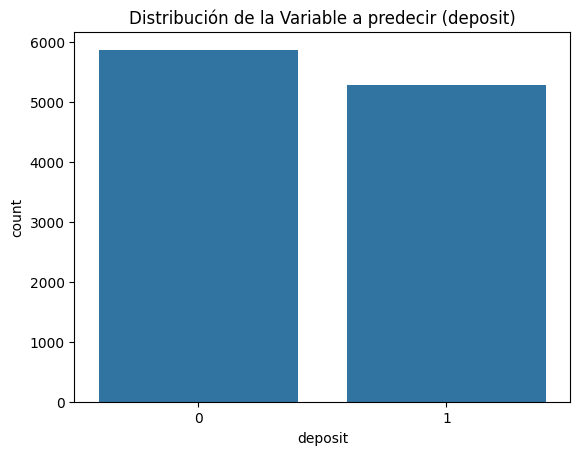

In [6]:
# Distribución de las variables numéricas
data_actualizado[["age", "balance", "day", "duration"]].describe()

# Distribución de la variable deposit
sns.countplot(x='deposit', data=data_actualizado)
plt.title("Distribución de la Variable a predecir (deposit)")
plt.show()

In [7]:
data_actualizado['deposit'].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

(esta pareja la distribucion de datos en deposit)

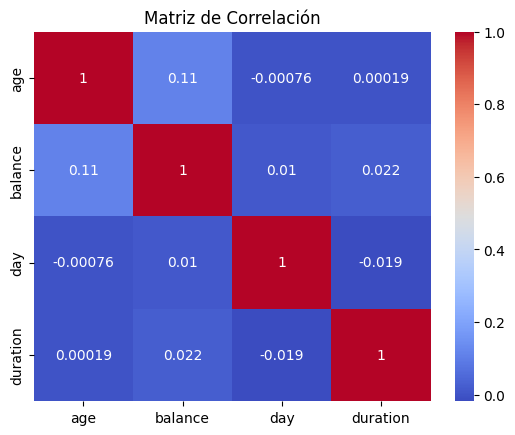

In [8]:
# Matriz de correlación de las variables numéricas con sns (heat map)
matriz_de_correlacion = data_actualizado[["age", "balance", "day", "duration"]].corr() 
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm') 
plt.title("Matriz de Correlación") 
plt.show()

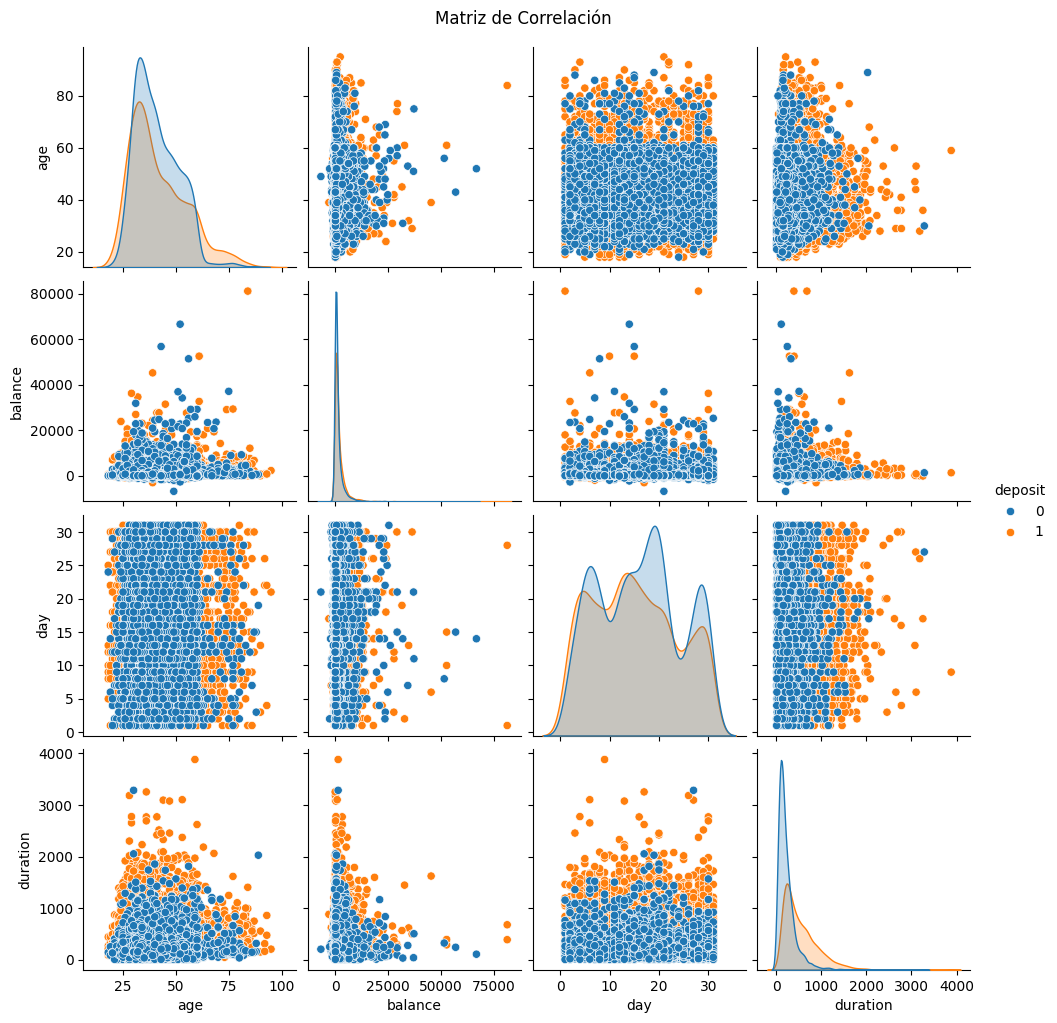

In [9]:
# Matriz de correlación (con seaborn) de las variables numéricas con la variable a predecir (deposit) 

sns.pairplot(data_actualizado[["age", "balance", "day", "duration", "deposit"]], hue='deposit', diag_kind='kde')
plt.suptitle("Matriz de Correlación", y=1.02)
plt.show()

In [10]:
data_actualizado["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

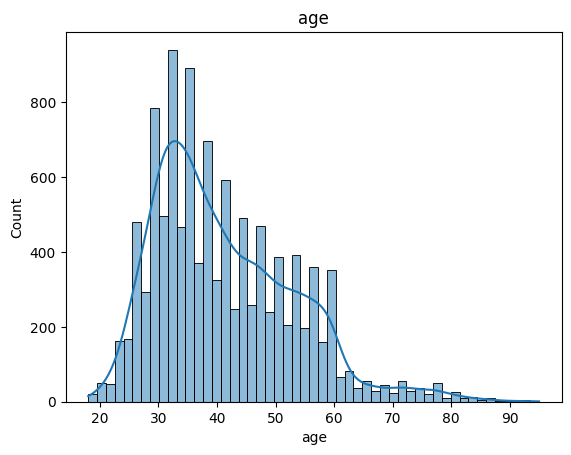

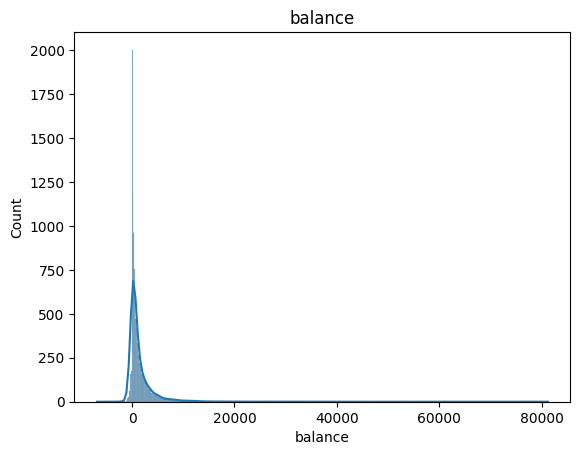

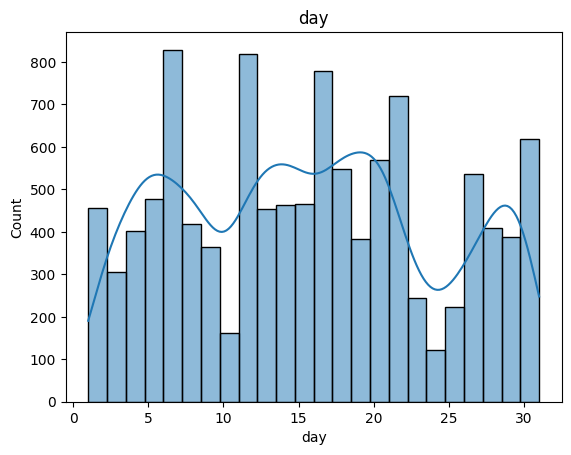

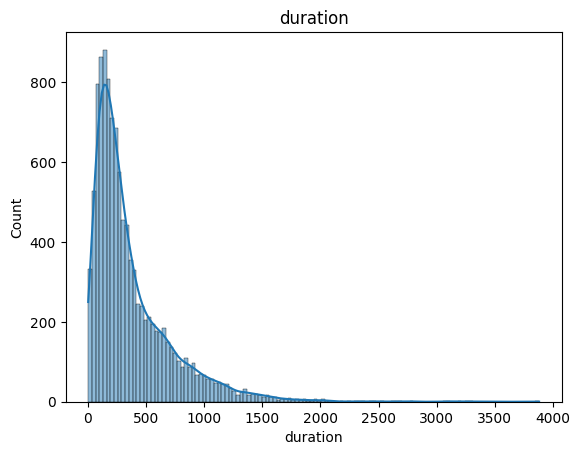

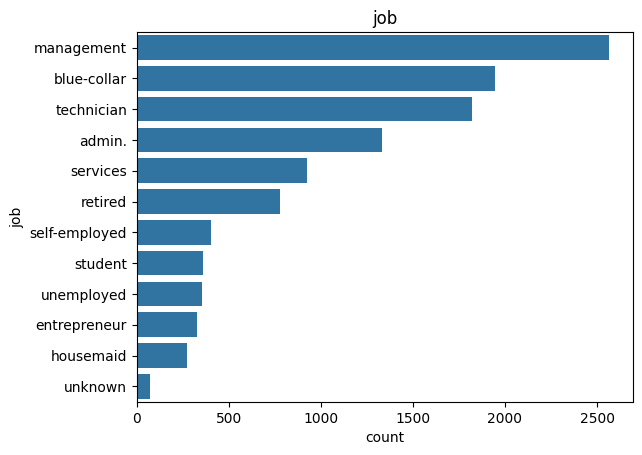

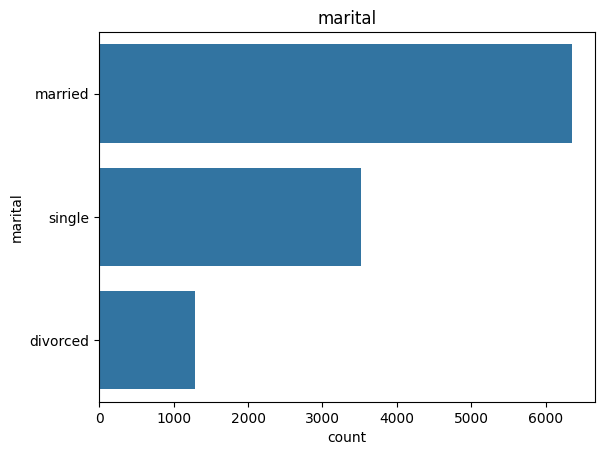

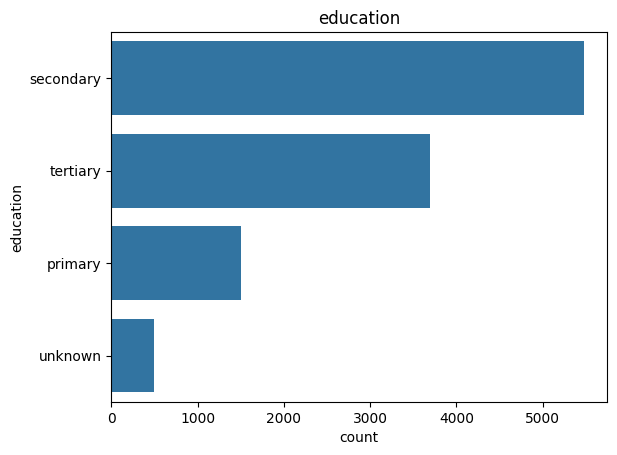

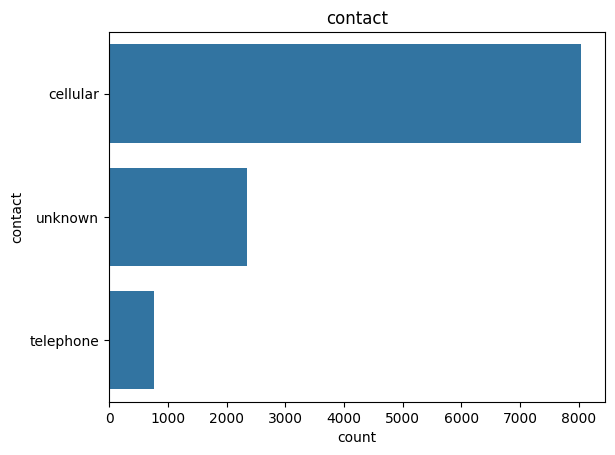

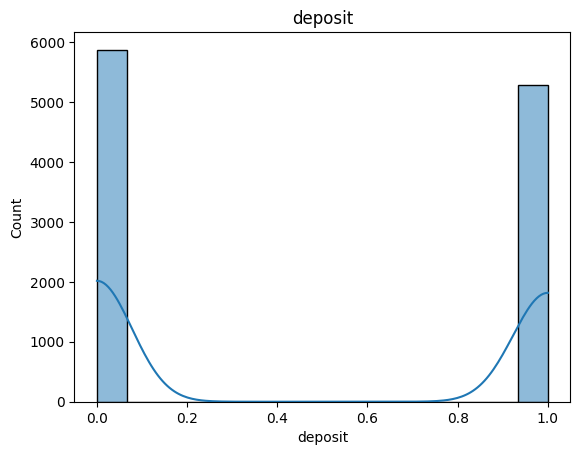

In [11]:

#por cada columna del data set de data_actualizado, chequeamos la distribucion de datos y lo ploteamos 
for col in data_actualizado.columns:
    if data_actualizado[col].dtype == 'object':
        sns.countplot(y=col, data=data_actualizado, order = data_actualizado[col].value_counts().index)
        plt.title(col)
        plt.show()
    else:
        sns.histplot(data_actualizado[col], kde=True)
        plt.title(col)
        plt.show()


# ONE HOT ENCODING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# # Convertir variables categóricas a columnas  
# data_dummies = pd.get_dummies(data_actualizado, drop_first=True)

# Train Test Split

In [13]:
X = data_actualizado.drop('deposit', axis=1)
y = data_actualizado['deposit']

In [14]:
#dividir el dataset en train, val y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [15]:
import numpy as np
# Identificar columnas no numéricas en X_train
non_numeric_columns_train = X_train.select_dtypes(exclude=[np.number]).columns
print("Columnas no numéricas en X_train:", non_numeric_columns_train)


# Identificar columnas no numéricas en X_val
non_numeric_columns_val = X_val.select_dtypes(exclude=[np.number]).columns
print("Columnas no numéricas en X_val:", non_numeric_columns_val)

Columnas no numéricas en X_train: Index(['job', 'marital', 'education', 'contact'], dtype='object')
Columnas no numéricas en X_val: Index(['job', 'marital', 'education', 'contact'], dtype='object')


In [28]:
for col in non_numeric_columns_train:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

for col in non_numeric_columns_val:
    X_val[col] = pd.to_numeric(X_val[col], errors='coerce')

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

#iumputer para los nan
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# creacion y entrenamiento del modelo
log_model = LogisticRegression()
log_model.fit(X_train_imputed, y_train)

#predecir en val
X_val_imputed = imputer.transform(X_val)
y_pred = log_model.predict(X_val_imputed)


#acurracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.7321988356471115


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['job' 'marital' 'education' 'contact']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['job' 'marital' 'education' 'contact']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


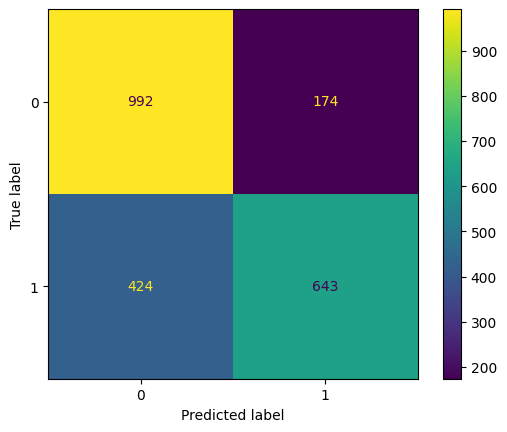

In [31]:
#matriz de confusion en val 
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
# Calcular y mostrar la accuracy
accuracy = accuracy_score(y_test, y_pred)


992 verdaderos negativos    -----------------            174 falsos negativos

424 falsos positivos        -------------------------             643 verdaderos positivos

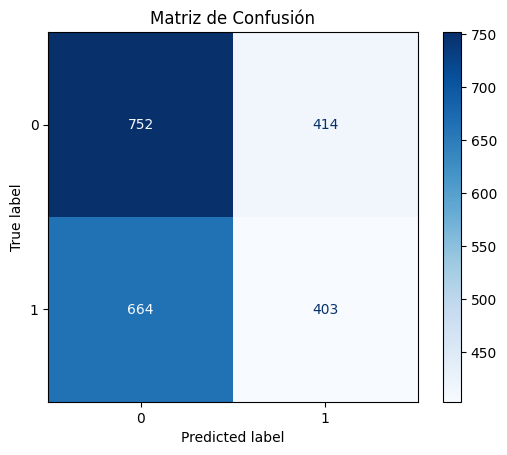

In [32]:
# Matriz de Confusión sobre los datos de Test
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


752 verdaderos negativos    -----------------            414 falsos negativos

664 falsos positivos        -------------------------             403 verdaderos positivos

## Performance del modelo

In [33]:
from sklearn.metrics import precision_score, roc_auc_score

precision_0 = precision_score(y_test, y_pred, pos_label=0)
precision_1 = precision_score(y_test, y_pred, pos_label=1)

roc_auc = roc_auc_score(y_test, y_pred)

print("Precision para 0:", precision_0)
print("Precision para 1:", precision_1)
print("ROC AUC:", roc_auc)


Precision para 0: 0.5310734463276836
Precision para 1: 0.49326805385556916
ROC AUC: 0.5113172180863291


### precision, recall, f1-score y support

In [34]:
# test
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.64      0.58      1166
           1       0.49      0.38      0.43      1067

    accuracy                           0.52      2233
   macro avg       0.51      0.51      0.51      2233
weighted avg       0.51      0.52      0.51      2233



In [35]:
# val
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1166
           1       0.79      0.60      0.68      1067

    accuracy                           0.73      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.73      0.73      2233



claramente le fue mucho mejor en validacion

# comparacion de coeficientes

In [36]:
print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)

Coefficients: [[ 6.68872963e-03  4.82282011e-05 -1.65104999e-02  4.41164464e-03]]
Intercept: [-1.67745759]


## sin escalado

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (4,).

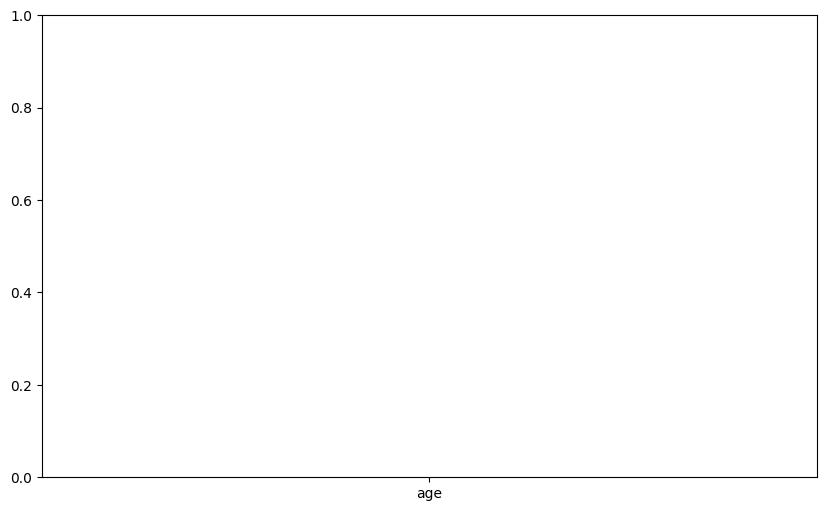

In [38]:
# Plotear los coeficientes sin escalar
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, log_model.coef_[0])
plt.title("Coeficientes del Modelo")
plt.xticks(rotation=45)
plt.show()




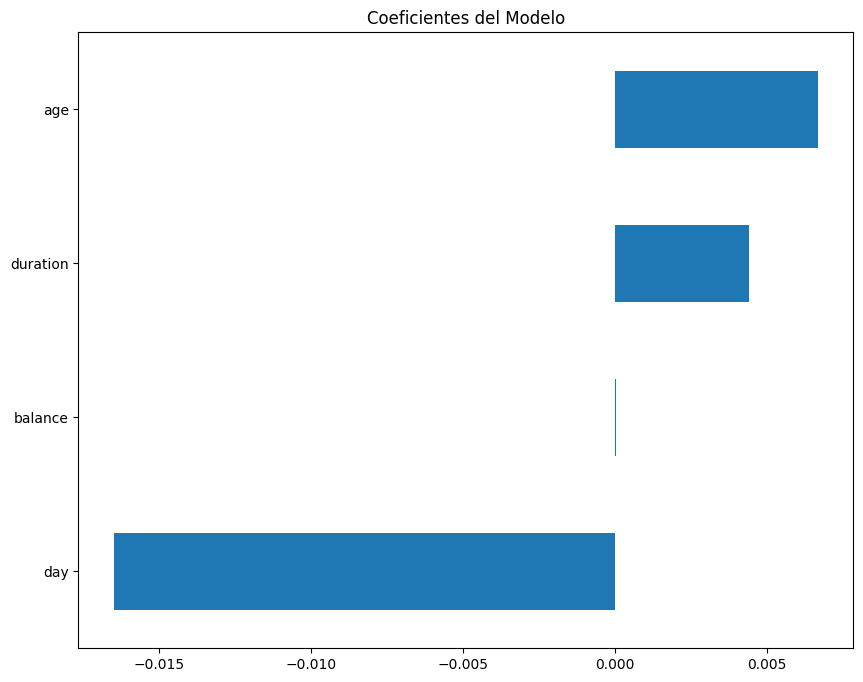

In [131]:
# lo mismo pero en orden de importancia
coef = log_model.coef_[0]
coef = pd.Series(coef, index=X_train.columns)
coef = coef.sort_values()
plt.figure(figsize=(10, 8))
coef.plot(kind='barh')
plt.title("Coeficientes del Modelo")
plt.show()

## con escalado

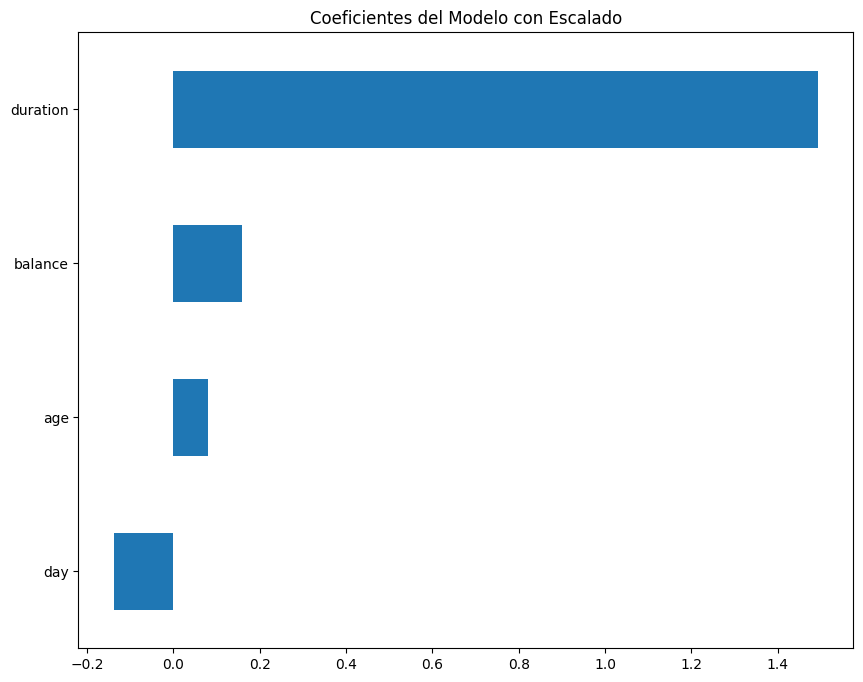

In [132]:
# Obtener los coeficientes y plotearlos con escalado
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

log_model_scaled = LogisticRegression()
log_model_scaled.fit(X_train_scaled, y_train)

coef_scaled = log_model_scaled.coef_[0]
coef_scaled = pd.Series(coef_scaled, index=X_train.columns)
coef_scaled = coef_scaled.sort_values()
plt.figure(figsize=(10, 8))
coef_scaled.plot(kind='barh')
plt.title("Coeficientes del Modelo con Escalado")
plt.show()

